## Stochastic Differential Equations


### Numerical Method
$$
dX(t) = f(X(t))dt + g(X(t)) dW(t),X(0) = X_0, 0 \leq t \leq T
$$
Let $\Delta t = \frac{T}{L} = R \delta t = R \frac{T}{N}$ so $L = N/R \in \mathbb{Z}$. Let $\tau_j = j \Delta t$ and $X_j = X(\tau_j)$.

$$
X_j = X_{j-1} + f(X_{j-1})\Delta \tau + g(X_{j-1})(W(\tau_j) - W(\tau_{j-1}))
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def sdeEM(f,g,X0=1,T=1,R=10,L=100,nsamples=20):
    N = R*L; dt = T/N; Dt = R*dt;
    dW = np.sqrt(dt)*np.random.randn(N,nsamples)
    W = np.vstack([np.zeros(nsamples),dW.cumsum(axis=0)])
    X = np.zeros((L+1,nsamples))
    X[0,:] = X0*np.ones(nsamples)
    for j in range(1,L+1):
        X[j,:] = X[j-1,:] + f(X[j-1,:])*Dt + g(X[j-1,:])*(W[j*R,:] - W[(j-1)*R,:])
    t = np.linspace(0,T,L+1)
    return t,X

### Constant Coefficient Equation

Visualize the solution of the SDE as the distribution of $X(t)$ for different samples $W(t)$ Consider the constant coefficient equation:
$$dX = aX(t) dt + bX(t)dW(t).$$

Compute the mean of samples and compare to exact solution.

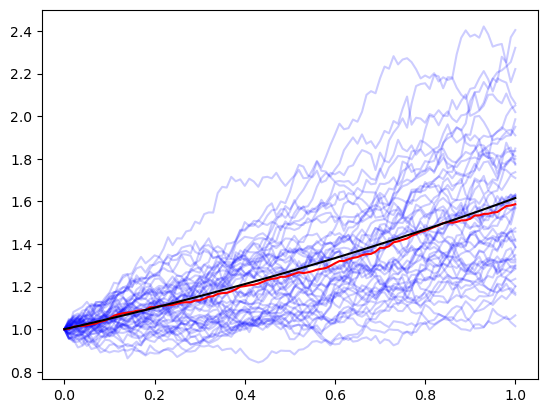

In [9]:
f = lambda x: 0.5*x
g = lambda x: 0.2*x
X0=1;
T=1;
R=10;
L=100;
nsamples=50;

a = 0.5; b = 0.2;
f = lambda x: a*x
g = lambda x: b*x
t,X = sdeEM(f,g,nsamples=50)
plt.plot(t,X,'b',alpha=0.2)
plt.plot(t,X.mean(axis=1),'r',t,np.exp((a - b**2/2)*t),'k')
plt.show()

## Logistic Equation:

Consider the logistic equation $$dX(t) = rX(t)(K-X(t))dt + \beta X(t)dW(t)$$

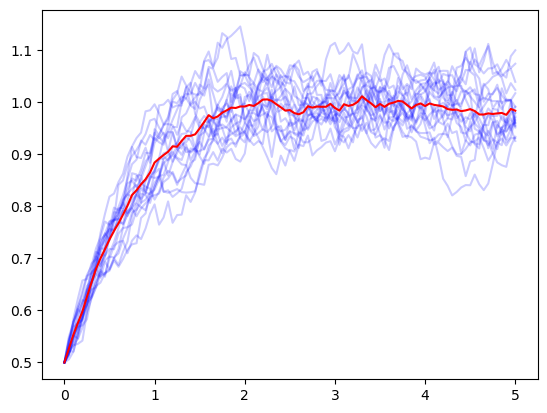

In [10]:
r = 2;
K = 1;
beta = 0.1;
X0 = 0.5;
T=10;
R=10;
L=100;
nsamples=50;

f = lambda x: r*x*(K - x)
g = lambda x: beta*x
t,X = sdeEM(f,g,X0,T=5)
plt.plot(t,X,'b',alpha=0.2)
plt.plot(t,X.mean(axis=1),'r')
plt.show()

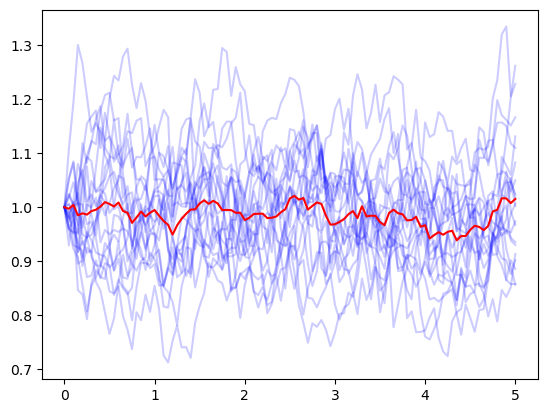

In [11]:
alpha = 2;
beta = 0.2;
X0 = 1;
T=5;
R=10;
L=100;
nsamples=50;

f = lambda x: r*x*(K - x)
g = lambda x: beta*x
t,X = sdeEM(f,g,X0,T=5)
plt.plot(t,X,'b',alpha=0.2)
plt.plot(t,X.mean(axis=1),'r')
plt.show()

## Stochastic Chain Rule

Suppose $X(t)$ satisfies $$dX(t)= f(X(t))dt + g(X(t))dW(t).$$ The stochastic chain rule for $V(X(t))$ is: $$dV(X(t) = \left( f(X(t)) \frac{dV(X(t))}{dX} + \frac{1}{2} (g(X(t)))^2 \frac{d^2V(X(t))}{dX^2} \right) dt + g(X(t)) \frac{dV(X(t))}{dX} dW(t).$$

Do the example: $$dX(t) = (\alpha - X(t)) dt + \beta \sqrt{X(t)} dW(t), V(X) = \sqrt{X} $$ and then the chain rule gives $$dV(X(t)) = \left( \frac{4\alpha - \beta^2}{8V(t)} \right)dt + \frac{1}{2} \beta dW(t).$$
 
Solve the SDE for $X(t)$ and $V(t)$ and then compare $V(t)$ to $\sqrt{X(t)}$.

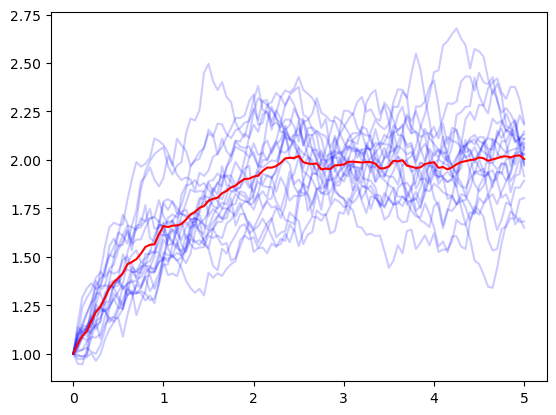

In [12]:
alpha = 2;
beta = 0.2;
X0 = 1;
T=5;
R=10;
L=100;
nsamples=50;

alpha = 2; beta = 0.2; 
f = lambda x: alpha - x
g = lambda x: beta*np.sqrt(np.abs(x))
t,X = sdeEM(f,g,T=5)
plt.plot(t,X,'b',alpha=0.2)
plt.plot(t,X.mean(axis=1),'r')
plt.show()

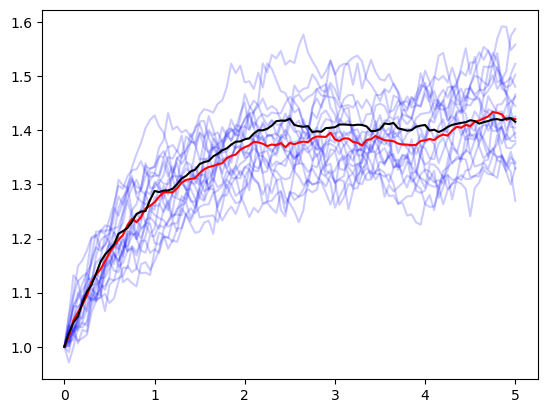

In [13]:
alpha = 2; beta = 0.2; 
f = lambda v: (4*alpha - beta**2)/8/v - 1/2*v
g = lambda v: beta/2*np.ones(v.shape)
t,V = sdeEM(f,g,T=5)
plt.plot(t,V,'b',alpha=0.2)
plt.plot(t,V.mean(axis=1),'r')
plt.plot(t,np.sqrt(X.mean(axis=1)),'k')
plt.show()